### Train the Prophet model

We want to test the performance of different forecasting methods on the four subsets of the ETT dataset (available at https://drive.google.com/file/d/1bnrv7gpn27yO54WJI-vuXP5NclE5BlBx/view). We will start with the prophet model as one of the most popular classical forecasting methods not involving neural networks.

### Data

+ Load the data

+ Divide the data into train (60%), validation (20%), and test (20%) sets

+ Standartize the data

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.6f}'.format)

In [2]:
df_h1 = pd.read_csv('ETT-small/ETTh1.csv')
df_h1['date'] = pd.to_datetime(df_h1['date'])
df_h1

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827000,2.009000,1.599000,0.462000,4.203000,1.340000,30.531000
1,2016-07-01 01:00:00,5.693000,2.076000,1.492000,0.426000,4.142000,1.371000,27.787001
2,2016-07-01 02:00:00,5.157000,1.741000,1.279000,0.355000,3.777000,1.218000,27.787001
3,2016-07-01 03:00:00,5.090000,1.942000,1.279000,0.391000,3.807000,1.279000,25.044001
4,2016-07-01 04:00:00,5.358000,1.942000,1.492000,0.462000,3.868000,1.279000,21.948000
...,...,...,...,...,...,...,...,...
17415,2018-06-26 15:00:00,-1.674000,3.550000,-5.615000,2.132000,3.472000,1.523000,10.904000
17416,2018-06-26 16:00:00,-5.492000,4.287000,-9.132000,2.274000,3.533000,1.675000,11.044000
17417,2018-06-26 17:00:00,2.813000,3.818000,-0.817000,2.097000,3.716000,1.523000,10.271000
17418,2018-06-26 18:00:00,9.243000,3.818000,5.472000,2.097000,3.655000,1.432000,9.778000


In [3]:
df_h2 = pd.read_csv('ETT-small/ETTh2.csv')
df_h2['date'] = pd.to_datetime(df_h2['date'])
df_h2

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,41.130001,12.481000,36.535999,9.355000,4.424000,1.311000,38.661999
1,2016-07-01 01:00:00,37.528000,10.136000,33.936001,7.532000,4.435000,1.215000,37.124001
2,2016-07-01 02:00:00,37.946999,11.309000,35.330002,9.007000,2.100000,0.000000,36.465000
3,2016-07-01 03:00:00,38.952000,11.895000,35.543999,9.436000,3.380000,1.215000,33.608501
4,2016-07-01 04:00:00,38.113998,11.476000,35.410000,9.623000,2.036000,0.000000,31.850500
...,...,...,...,...,...,...,...,...
17415,2018-06-26 15:00:00,39.202999,11.392000,49.644001,11.929000,-10.331000,-1.258000,47.084999
17416,2018-06-26 16:00:00,38.113998,10.974000,48.759998,11.366000,-10.331000,-1.290000,48.183498
17417,2018-06-26 17:00:00,39.622002,10.974000,50.609001,11.661000,-11.557000,-1.418000,48.183498
17418,2018-06-26 18:00:00,43.643002,13.403000,54.737000,13.778000,-10.299000,-1.418000,46.865501


In [4]:
df_m1 = pd.read_csv('ETT-small/ETTm1.csv')
df_m1['date'] = pd.to_datetime(df_m1['date'])
df_m1

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827000,2.009000,1.599000,0.462000,4.203000,1.340000,30.531000
1,2016-07-01 00:15:00,5.760000,2.076000,1.492000,0.426000,4.264000,1.401000,30.459999
2,2016-07-01 00:30:00,5.760000,1.942000,1.492000,0.391000,4.234000,1.310000,30.038000
3,2016-07-01 00:45:00,5.760000,1.942000,1.492000,0.426000,4.234000,1.310000,27.013000
4,2016-07-01 01:00:00,5.693000,2.076000,1.492000,0.426000,4.142000,1.371000,27.787001
...,...,...,...,...,...,...,...,...
69675,2018-06-26 18:45:00,9.310000,3.550000,5.437000,1.670000,3.868000,1.462000,9.567000
69676,2018-06-26 19:00:00,10.114000,3.550000,6.183000,1.564000,3.716000,1.462000,9.567000
69677,2018-06-26 19:15:00,10.784000,3.349000,7.000000,1.635000,3.746000,1.432000,9.426000
69678,2018-06-26 19:30:00,11.655000,3.617000,7.533000,1.706000,4.173000,1.523000,9.426000


In [5]:
df_m2 = pd.read_csv('ETT-small/ETTm2.csv')
df_m2['date'] = pd.to_datetime(df_m2['date'])
df_m2

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,41.130001,12.481000,36.535999,9.355000,4.424000,1.311000,38.661999
1,2016-07-01 00:15:00,39.622002,11.309000,35.543999,8.551000,3.209000,1.258000,38.223000
2,2016-07-01 00:30:00,38.868000,10.555000,34.365002,7.586000,4.435000,1.258000,37.344002
3,2016-07-01 00:45:00,35.518002,9.214000,32.569000,8.712000,4.435000,1.215000,37.124001
4,2016-07-01 01:00:00,37.528000,10.136000,33.936001,7.532000,4.435000,1.215000,37.124001
...,...,...,...,...,...,...,...,...
69675,2018-06-26 18:45:00,42.722000,12.230000,54.014000,12.652000,-11.525000,-1.418000,45.986500
69676,2018-06-26 19:00:00,38.868000,10.052000,49.859001,10.669000,-11.525000,-1.418000,45.986500
69677,2018-06-26 19:15:00,39.622002,11.057000,50.448002,11.795000,-10.299000,-1.418000,45.546501
69678,2018-06-26 19:30:00,40.459999,11.392000,51.841999,11.929000,-11.536000,-1.418000,45.546501


In [6]:
from split_data import split_dataframe
from normalisation import standardize_data

**Check how the split and standardize function work**

In [7]:
train_h1, val_h1, test_h1 = split_dataframe(df_h1)

assert len(train_h1) + len(val_h1) + len(test_h1) == len(df_h1), 'Lengths do not match'

train_h1, val_h1, test_h1 = standardize_data(train_h1, val_h1, test_h1)

In [8]:
train_h1

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT,date
0,-0.322758,0.021044,-0.550889,-0.122196,0.969617,0.852812,1.554893,2016-07-01 00:00:00
1,-0.344601,0.052270,-0.568997,-0.140467,0.920831,0.899232,1.232603,2016-07-01 01:00:00
2,-0.431973,-0.103858,-0.605045,-0.176500,0.628914,0.670130,1.232603,2016-07-01 02:00:00
3,-0.442895,-0.010181,-0.605045,-0.158230,0.652907,0.761471,0.910430,2016-07-01 03:00:00
4,-0.399209,-0.010181,-0.568997,-0.122196,0.701693,0.761471,0.546797,2016-07-01 04:00:00
...,...,...,...,...,...,...,...,...
10447,0.255917,-0.384423,0.194779,-0.572870,-0.004506,0.488945,-0.395055,2017-09-09 07:00:00
10448,-0.857748,-0.321972,-0.881582,-0.338398,0.141852,0.852812,-0.271143,2017-09-09 08:00:00
10449,-1.392738,-0.821582,-1.447011,-0.771309,-0.028499,0.578788,-0.262921,2017-09-09 09:00:00
10450,-2.266131,-0.353197,-2.366995,-0.645445,0.165846,0.670130,-0.122448,2017-09-09 10:00:00


In [9]:
train_h1.describe() # mean and std are equal to 0 and 1, respectively

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT,date
count,10452.000000,10452.000000,10452.000000,10452.000000,10452.000000,10452.000000,10452.000000,10452
mean,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,2017-02-03 17:30:00
min,-4.329639,-3.131813,-4.423760,-3.368266,-3.341956,-3.206633,-2.510260,2016-07-01 00:00:00
25%,-0.257230,-0.790356,-0.178055,-0.771309,-0.637926,-0.241785,-0.750350,2016-10-17 20:45:00
50%,0.135781,-0.072633,0.182763,0.021938,-0.199650,0.214921,-0.089326,2017-02-03 17:30:00
75%,0.583562,0.708008,0.591815,0.761388,0.409776,0.625208,0.497232,2017-05-23 14:15:00
max,2.581541,3.798415,2.113276,3.484717,4.404639,3.407372,3.372590,2017-09-09 11:00:00
std,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [10]:
val_h1.head()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT,date
10452,-2.200602,-0.571777,-2.354979,-0.861646,-0.174857,0.852812,-0.139009,2017-09-09 12:00:00
10453,-3.281503,0.364526,-3.263117,0.166580,-0.102078,0.533866,-0.122448,2017-09-09 13:00:00
10454,-2.768356,0.021044,-2.842219,-0.104433,-0.321216,0.488945,0.001465,2017-09-09 14:00:00
10455,-1.960492,-0.540551,-1.988238,-0.608904,-0.540353,0.259843,-0.023318,2017-09-09 15:00:00
10456,-1.643769,-0.915259,-1.711532,-0.843376,-0.272430,0.442525,0.009804,2017-09-09 16:00:00


In [11]:
test_h1.head()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT,date
13936,-0.672083,0.114721,-0.941832,0.328478,0.896837,0.259843,-1.584850,2018-02-01 16:00:00
13937,0.900122,0.364526,0.615847,0.364511,1.383899,0.077160,-1.609633,2018-02-01 17:00:00
13938,1.271289,0.458203,0.916585,0.184343,1.798181,0.214921,-1.584850,2018-02-01 18:00:00
13939,1.773515,0.864137,1.367608,0.598983,2.212463,0.077160,-1.609633,2018-02-01 19:00:00
13940,1.664463,0.739234,1.289419,0.473120,2.042111,0.123580,-1.642755,2018-02-01 20:00:00


**Everything makes sense**

In [12]:
train_h2, val_h2, test_h2 = split_dataframe(df_h2)
train_h2, val_h2, test_h2 = standardize_data(train_h2, val_h2, test_h2)

train_m1, val_m1, test_m1 = split_dataframe(df_m1)
train_m1, val_m1, test_m1 = standardize_data(train_m1, val_m1, test_m1)

train_m2, val_m2, test_m2 = split_dataframe(df_m2)
train_m2, val_m2, test_m2 = standardize_data(train_m2, val_m2, test_m2)

### Plot data to see how it looks like

In [13]:
import matplotlib.pyplot as plt
def plot_df(df):
    """
    Plots the 'OT' feature against the 'date' feature from the df_h1 dataframe.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df['OT'], label='OT', color='blue')
    plt.xlabel('Date')
    plt.ylabel('OT')
    plt.title('Time Series Plot of OT')
    plt.grid()
    plt.legend()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

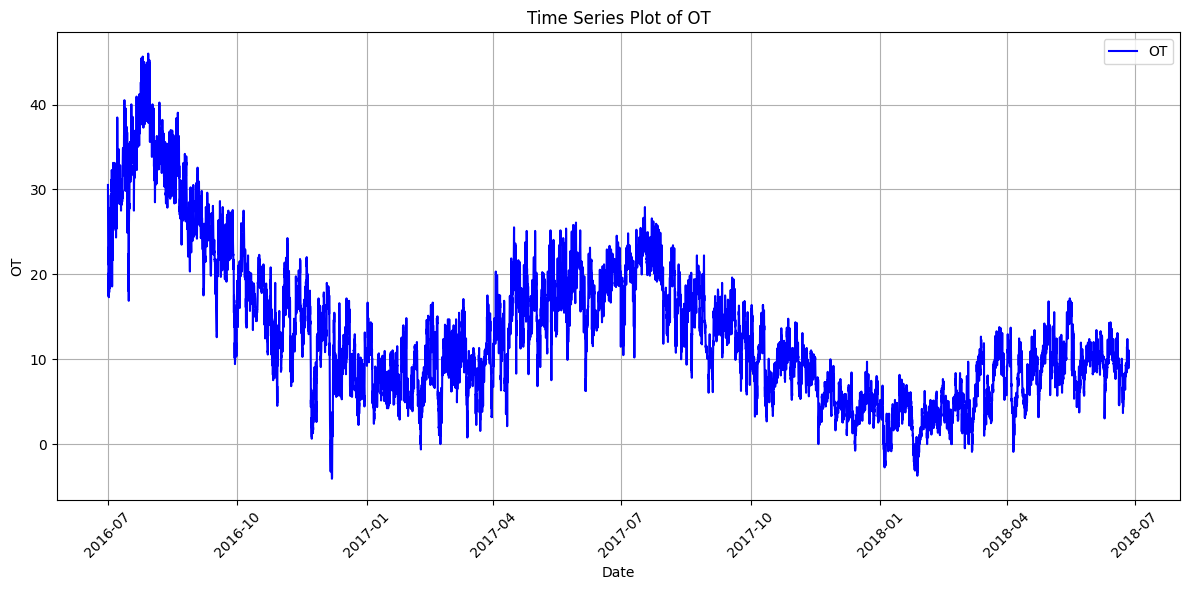

In [14]:
# We see that this time series is not stationary, as there is a downward trend (although not very strong)
# There is also a seasonal component (the peaks are not the same)
plot_df(df_h1)

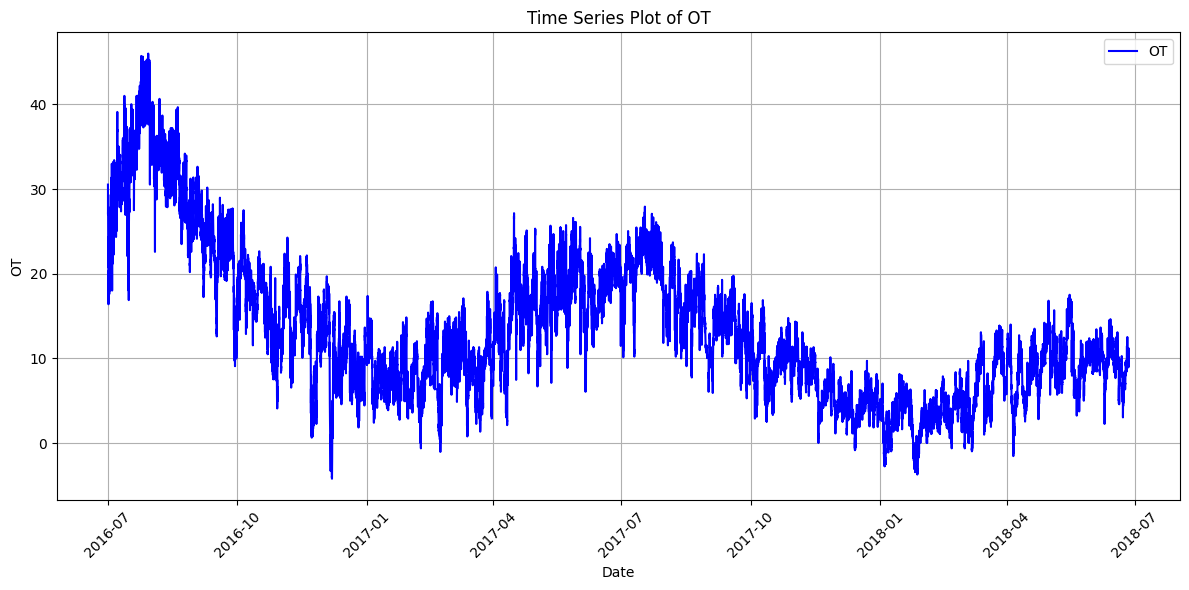

In [38]:
# Looks like h1
plot_df(df_m1)

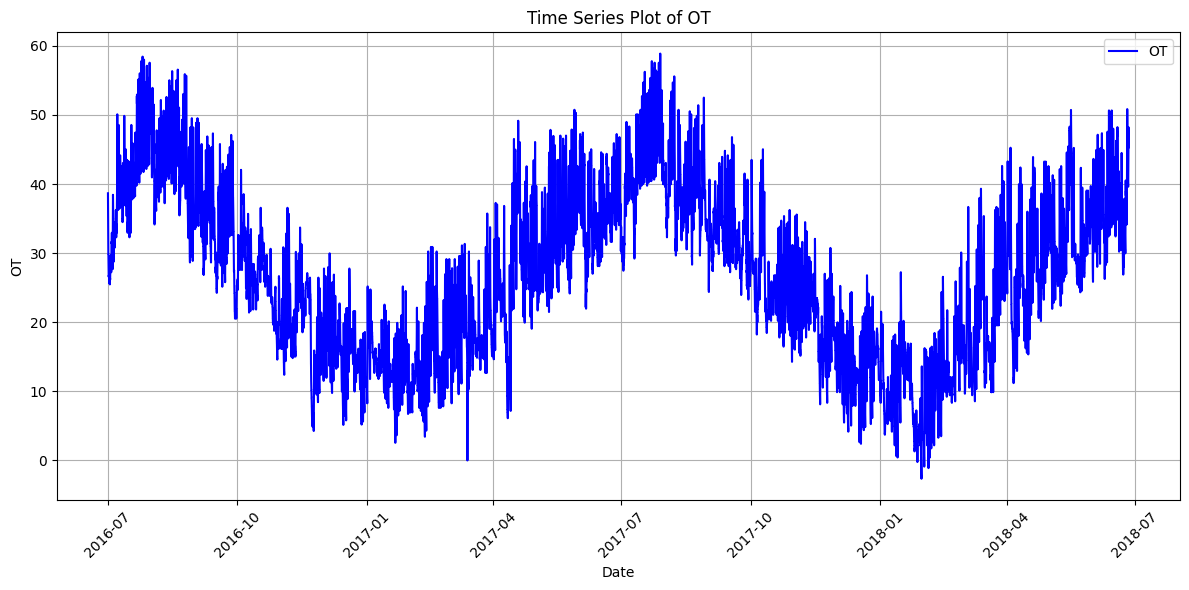

In [15]:
# This time series looks more stationary, as there is no clear trend
# There is a strong seasonal component
plot_df(df_m2)

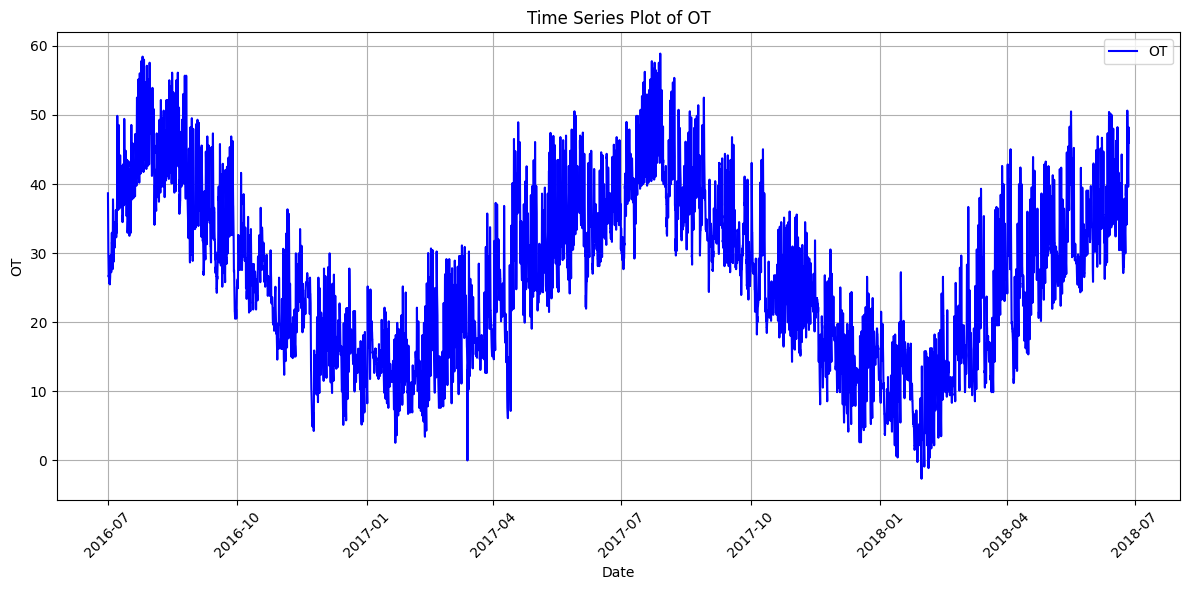

In [40]:
# M2 and h2 look the same
plot_df(df_h2)

### Forecasting using classical methods (Prophet)

**We will choose Prophet, because, compared to ARIMA (or most of other popular classical statistical methods):**

+ Does not rely so strongly on the assumption of stationarity, which is not always true for the time series we are working with.

+ It deals with seasonality more easily, as it is designed to handle it (remember that seasonality is one of the Prophet's forecasting components).

+ Prophet is a newer and a more flexible method, which was shown to outperform models like ARIMA in several use cases (like Bitcoin price forecasting, transportation forecasting, etc.).

+ Prophet is better for long-term forecasting, as, according to the ARIMA assumptions, it's long-term prediciton converges to the mean, which is not desirable. In our case, the prediciton horizon is not so short.

In Prophet, the hyperparameter tuning is not that important (at least from my experience and in my opinion). Instead, setting up the hyperparameters so that they align with the data distribution makes more sense. However, since the creators of the model claim that Prophet works well with the default hyperparameters, we will not do the hyperparameter selection. Instead, we will see whether the default Prophet can outperform a neural network in forecasting the time serieses we are working with. In this sense, the validation dataset is not very important, because we do not tune the hyperparameters using it, and we do not calculate losses on it while training (this is what we will do while training the neural network). Hence, while training Prophet, we can just combine the train and validation datasets together, and then test the model on the test dataset.

+ Input window size parameter is irrelevant for Prophet, because Prophet uses the whole dataset to make predictions. This hyperparameter will be important when we will train the neural network.

The final pipeline:

+ Combine the train and the validation sets together so that we have more data to train the model.

+ Train the Prophet model with the default hyperparameters.

+ Test the model on the test dataset: calculate the MAE and the MSE, plot the data. Prediction lengths: 96 and 192 (let's see whether the model degradates after some steps, or continues performing well even for longer forecastings).

### Forecast h1

In [16]:
from prophet_model import train_prophet_model, evaluate_prophet_model

Importing plotly failed. Interactive plots will not work.


In [17]:
prophet_h1 = train_prophet_model(train_h1, val_h1)
prophet_h1

14:25:18 - cmdstanpy - INFO - Chain [1] start processing
14:25:23 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
! mkdir results_images

mkdir: cannot create directory ‘results_images’: File exists


In [19]:
metrics = pd.DataFrame(columns=['model', 'prediction_length', 'dataset', 'mse', 'mae'])
metrics

,model,prediction_length,dataset,mse,mae


Mean Squared Error (MSE): 0.0660
Mean Absolute Error (MAE): 0.2171
Plot saved as results_images/prophet_h1_96.png


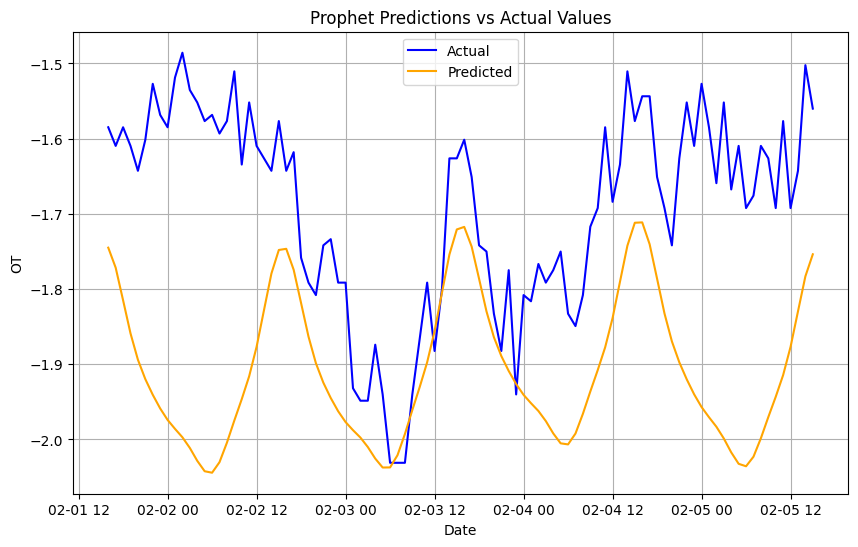

In [20]:
# Not that bad, at least it understand the seasonality (yet not all the time). Regarding trend, it is not clealry observed in this dataframe
mse_h1_96_prophet, mae_h1_96_prophet = evaluate_prophet_model(prophet_h1, test_h1, n_steps=96, save_plot=True, plot_filename="results_images/prophet_h1_96.png")

In [21]:
new_row = pd.DataFrame([['prophet', 96, 'h1', mse_h1_96_prophet, mae_h1_96_prophet]],
                        columns=metrics.columns)
metrics = pd.concat([metrics, new_row], ignore_index=True)
metrics

/tmp/ipykernel_1340727/2552127441.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics = pd.concat([metrics, new_row], ignore_index=True)


,model,prediction_length,dataset,mse,mae
0,prophet,96,h1,0.065999,0.217063


In [22]:
mse_h1_96_prophet, mae_h1_96_prophet

(0.06599863738874522, 0.21706269034877468)

Mean Squared Error (MSE): 0.1107
Mean Absolute Error (MAE): 0.2954
Plot saved as results_images/prophet_h1_192.png


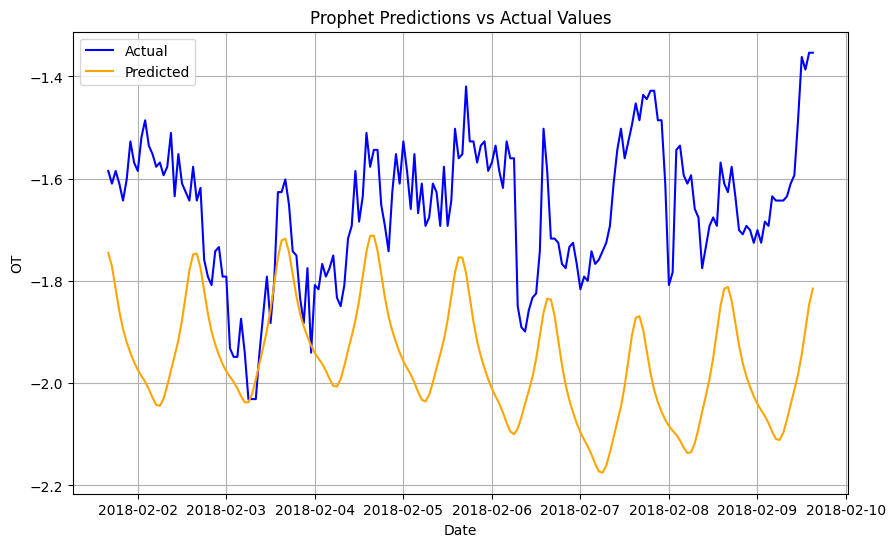

In [23]:
mse_h1_192_prophet, mae_h1_192_prophet = evaluate_prophet_model(prophet_h1, test_h1, n_steps=192, save_plot=True, plot_filename="results_images/prophet_h1_192.png")

In [24]:
new_row = pd.DataFrame([['prophet', 192, 'h1', mse_h1_96_prophet, mae_h1_96_prophet]],
                        columns=metrics.columns)
metrics = pd.concat([metrics, new_row], ignore_index=True)
metrics

,model,prediction_length,dataset,mse,mae
0,prophet,96,h1,0.065999,0.217063
1,prophet,192,h1,0.065999,0.217063


**I noticed that the predictions are biased almost all the time. Maybe the data distributions of validation and test sets are different?**

In [25]:
val_h1['OT'].describe()


count   3484.000000
mean      -1.206008
std        0.516034
min       -2.468916
25%       -1.576629
50%       -1.270900
75%       -0.833036
max        0.274190
Name: OT, dtype: float64

In [26]:
test_h1['OT'].describe()

count   3484.000000
mean      -1.124169
std        0.404793
min       -2.138522
25%       -1.452716
50%       -1.072640
75%       -0.816475
max       -0.014979
Name: OT, dtype: float64

**Yes, there is a difference in the data distributions**

### Forecast h2

In [27]:
from prophet_model import train_and_evaluate

14:25:24 - cmdstanpy - INFO - Chain [1] start processing
14:25:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 0.0656
Mean Absolute Error (MAE): 0.2174
Plot saved as results_images/prophet_h2_96.png


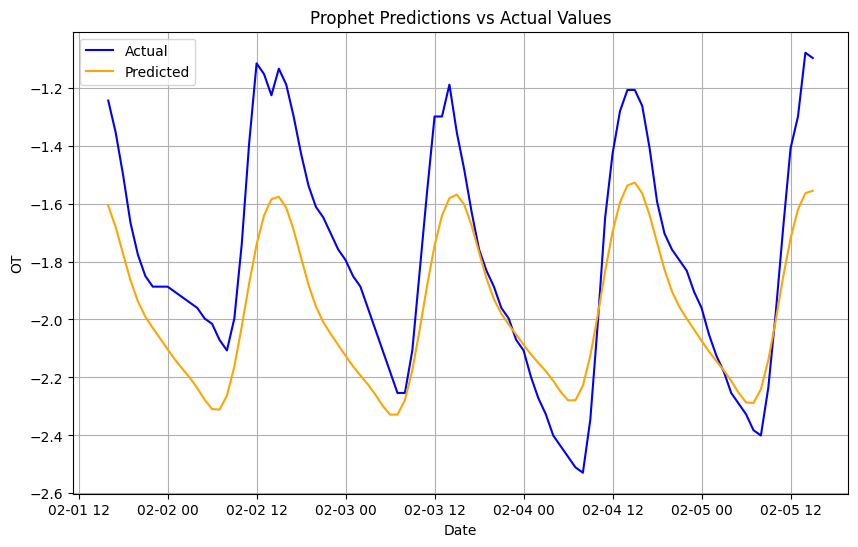

,model,prediction_length,dataset,mse,mae
0,prophet,96,h1,0.065999,0.217063
1,prophet,192,h1,0.065999,0.217063
2,prophet,96,h2,0.065617,0.217434


In [28]:
prophet_h2_96, mse_h2_96_prophet, mae_h2_96_prophet = train_and_evaluate(train_h2, val_h2, test_h2, n_steps=96, save_plot=True, plot_filename="results_images/prophet_h2_96.png")
new_row = pd.DataFrame([['prophet', 96, 'h2', mse_h2_96_prophet, mae_h2_96_prophet]],
                        columns=metrics.columns)
metrics = pd.concat([metrics, new_row], ignore_index=True)
metrics

14:25:28 - cmdstanpy - INFO - Chain [1] start processing
14:25:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 0.1182
Mean Absolute Error (MAE): 0.2930
Plot saved as results_images/prophet_h2_192.png


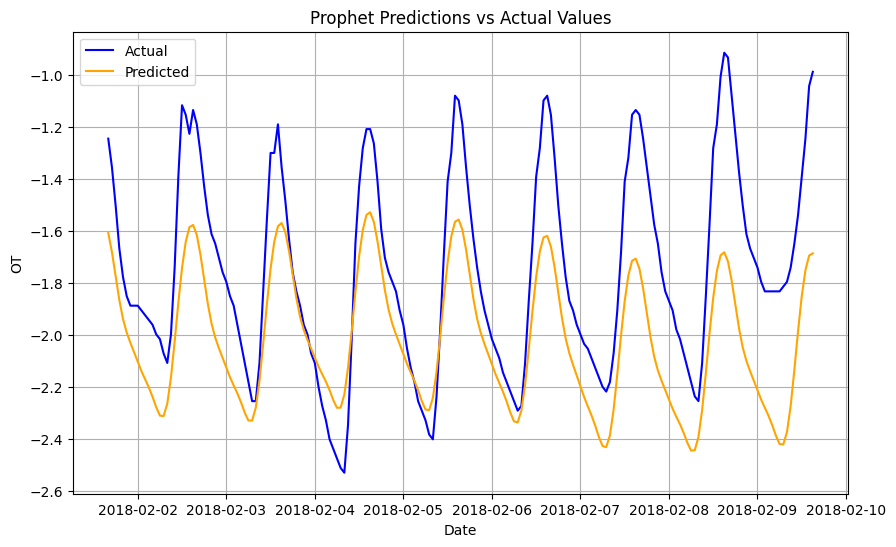

,model,prediction_length,dataset,mse,mae
0,prophet,96,h1,0.065999,0.217063
1,prophet,192,h1,0.065999,0.217063
2,prophet,96,h2,0.065617,0.217434
3,prophet,192,h2,0.118225,0.293031


In [29]:
prophet_h2_192, mse_h2_192_prophet, mae_h2_192_prophet = train_and_evaluate(train_h2, val_h2, test_h2, n_steps=192, save_plot=True, plot_filename="results_images/prophet_h2_192.png")
new_row = pd.DataFrame([['prophet', 192, 'h2', mse_h2_192_prophet, mae_h2_192_prophet]],
                        columns=metrics.columns)
metrics = pd.concat([metrics, new_row], ignore_index=True)
metrics

**As we see, Prophet performs way better on h2, rather than on h1. Most likely it is because of the data distribtuion. H2 looks more stationary, and the test sample follows the same distibution as the train sample, opposed to h1.**

### Forecast m1

14:25:33 - cmdstanpy - INFO - Chain [1] start processing
14:26:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 0.1177
Mean Absolute Error (MAE): 0.3198
Plot saved as results_images/prophet_m1_96.png


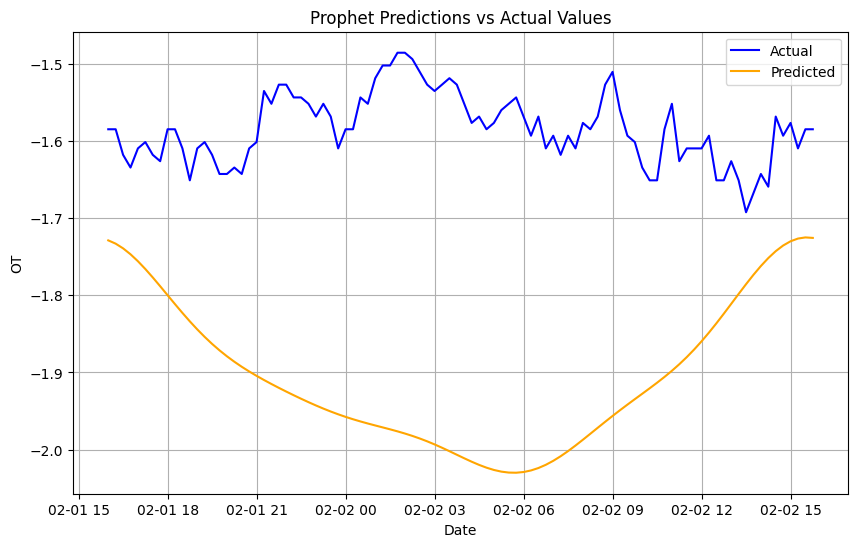

,model,prediction_length,dataset,mse,mae
0,prophet,96,h1,0.065999,0.217063
1,prophet,192,h1,0.065999,0.217063
2,prophet,96,h2,0.065617,0.217434
3,prophet,192,h2,0.118225,0.293031
4,prophet,96,m1,0.117716,0.319764


In [30]:
prophet_m1_96, mse_m1_96_prophet, mae_m1_96_prophet = train_and_evaluate(train_m1, val_m1, test_m1, n_steps=96, save_plot=True, plot_filename="results_images/prophet_m1_96.png")
new_row = pd.DataFrame([['prophet', 96, 'm1', mse_m1_96_prophet, mae_m1_96_prophet]],
                        columns=metrics.columns)
metrics = pd.concat([metrics, new_row], ignore_index=True)
metrics

14:26:05 - cmdstanpy - INFO - Chain [1] start processing
14:26:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 0.0632
Mean Absolute Error (MAE): 0.1991
Plot saved as results_images/prophet_m1_192.png


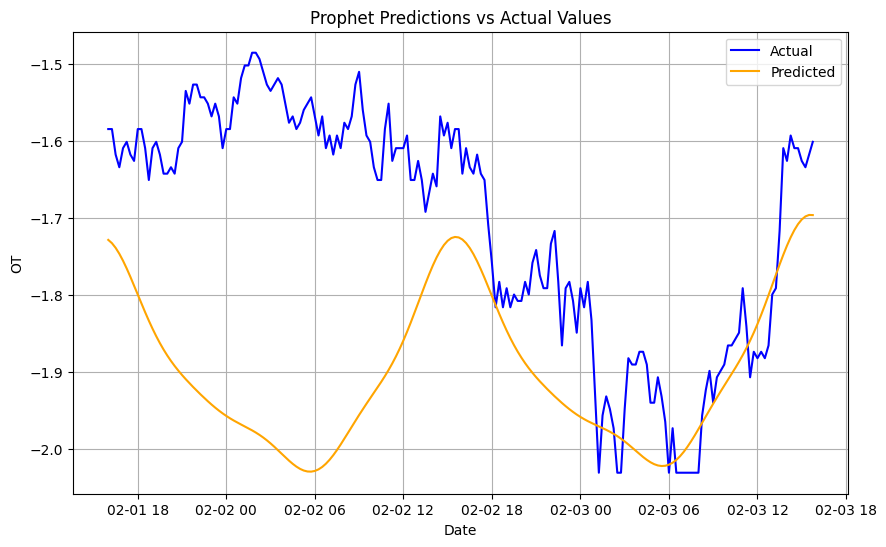

,model,prediction_length,dataset,mse,mae
0,prophet,96,h1,0.065999,0.217063
1,prophet,192,h1,0.065999,0.217063
2,prophet,96,h2,0.065617,0.217434
3,prophet,192,h2,0.118225,0.293031
4,prophet,96,m1,0.117716,0.319764
5,prophet,192,m1,0.063154,0.199072


In [31]:
prophet_m1_192, mse_m1_192_prophet, mae_m1_192_prophet = train_and_evaluate(train_m1, val_m1, test_m1, n_steps=192, save_plot=True, plot_filename="results_images/prophet_m1_192.png")
new_row = pd.DataFrame([['prophet', 192, 'm1', mse_m1_192_prophet, mae_m1_192_prophet]],
                        columns=metrics.columns)
metrics = pd.concat([metrics, new_row], ignore_index=True)
metrics

**In this case, the results are not good. The reason is that the distribution of m1 is similar to the distribution of h1, hence, the problems are identical.**

### Forecast m2

14:26:36 - cmdstanpy - INFO - Chain [1] start processing
14:26:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 0.0877
Mean Absolute Error (MAE): 0.2684
Plot saved as results_images/prophet_m2_96.png


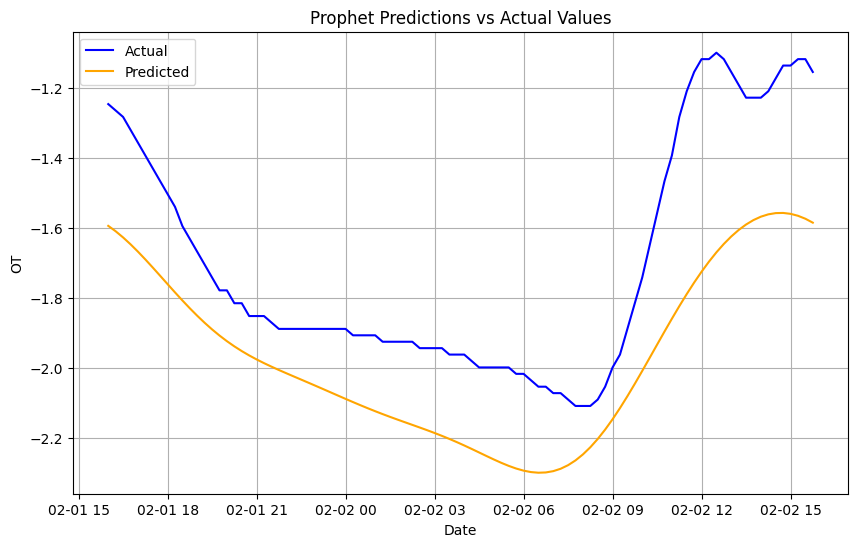

,model,prediction_length,dataset,mse,mae
0,prophet,96,h1,0.065999,0.217063
1,prophet,192,h1,0.065999,0.217063
2,prophet,96,h2,0.065617,0.217434
3,prophet,192,h2,0.118225,0.293031
4,prophet,96,m1,0.117716,0.319764
5,prophet,192,m1,0.063154,0.199072
6,prophet,96,m2,0.087718,0.268407


In [32]:
prophet_m2_96, mse_m2_96_prophet, mae_m2_96_prophet = train_and_evaluate(train_m2, val_m2, test_m2, n_steps=96, save_plot=True, plot_filename="results_images/prophet_m2_96.png")
new_row = pd.DataFrame([['prophet', 96, 'm2', mse_m2_96_prophet, mae_m2_96_prophet]],
                        columns=metrics.columns)
metrics = pd.concat([metrics, new_row], ignore_index=True)
metrics

14:27:00 - cmdstanpy - INFO - Chain [1] start processing
14:27:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 0.0832
Mean Absolute Error (MAE): 0.2634
Plot saved as results_images/prophet_m2_192.png


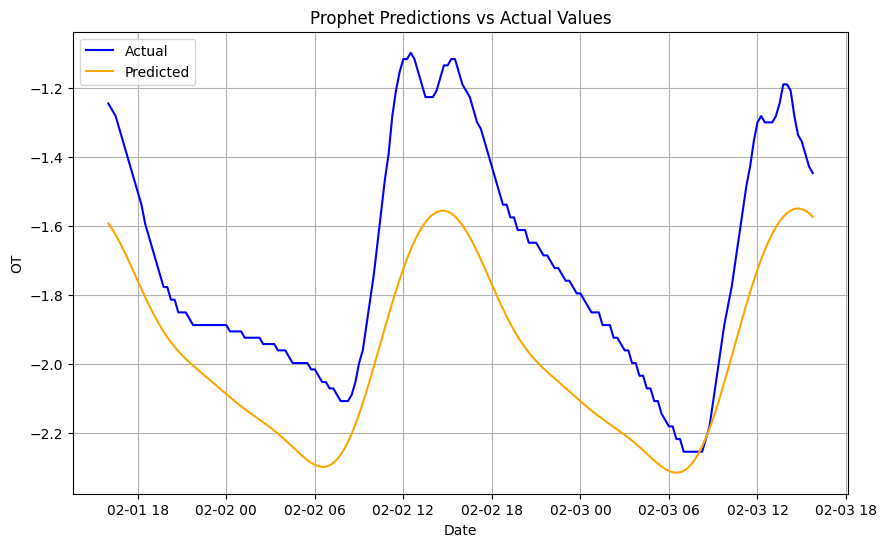

,model,prediction_length,dataset,mse,mae
0,prophet,96,h1,0.065999,0.217063
1,prophet,192,h1,0.065999,0.217063
2,prophet,96,h2,0.065617,0.217434
3,prophet,192,h2,0.118225,0.293031
4,prophet,96,m1,0.117716,0.319764
5,prophet,192,m1,0.063154,0.199072
6,prophet,96,m2,0.087718,0.268407
7,prophet,192,m2,0.083220,0.263415


In [33]:
prophet_m2_192, mse_m2_192_prophet, mae_m2_192_prophet = train_and_evaluate(train_m2, val_m2, test_m2, n_steps=192, save_plot=True, plot_filename="results_images/prophet_m2_192.png")
new_row = pd.DataFrame([['prophet', 192, 'm2', mse_m2_192_prophet, mae_m2_192_prophet]],
                        columns=metrics.columns)
metrics = pd.concat([metrics, new_row], ignore_index=True)
metrics

**The performance is quite good.**

In [35]:
metrics.to_csv("prophet_metrics.csv", index=False)

### Results

**We see that the resutls vary from time series to time series. Prophet performs well on h2 and m2, but poorly on h1 and m1. This is likely due to the fact that h2 and m2 are more stationary, and the test samples follow the same distributions as the train samples, opposed to h1 and m1.**

### References

https://drive.google.com/file/d/1bnrv7gpn27yO54WJI-vuXP5NclE5BlBx/view - link to the data